# Import Librarys

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

# Import CSV file

In [2]:
df = pd.read_csv("crocodile_dataset.csv")

# Preprocessing

## Find counts of null Values

In [3]:
df.isnull().sum()

Observation ID          0
Common Name             0
Scientific Name         0
Family                  0
Genus                   0
Observed Length (m)     0
Observed Weight (kg)    0
Age Class               0
Sex                     0
Date of Observation     0
Country/Region          0
Habitat Type            0
Conservation Status     0
Observer Name           0
Notes                   0
dtype: int64

## Find counts of Duplicate values

In [4]:
df.duplicated().sum()

np.int64(0)

### Let's convert Date into proper format because... next moves on the way

In [5]:
df['Date of Observation'] = pd.to_datetime(df['Date of Observation'], format='%d-%m-%Y')

## Date Duration

In [6]:
df["Date of Observation"].min(), df["Date of Observation"].max()

(Timestamp('2005-01-29 00:00:00'), Timestamp('2025-12-23 00:00:00'))

### Let's create more column using Date because... next Charts are on the way using this columns

In [7]:
df["Date of Observation"] = pd.to_datetime(df["Date of Observation"], format="%d-%m-%Y")
df["Year"] = df["Date of Observation"].dt.year
df["Month"] = df["Date of Observation"].dt.month
df["Day"] = df["Date of Observation"].dt.day
df["Season"] = df["Month"]%12 // 3 + 1
df["Season"] = df["Season"].map({1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"})

### Oh.., Now we have 4 more columns. means more fun in charts

In [8]:
print(df.columns.tolist())

['Observation ID', 'Common Name', 'Scientific Name', 'Family', 'Genus', 'Observed Length (m)', 'Observed Weight (kg)', 'Age Class', 'Sex', 'Date of Observation', 'Country/Region', 'Habitat Type', 'Conservation Status', 'Observer Name', 'Notes', 'Year', 'Month', 'Day', 'Season']


## Check Shape

In [9]:
df.shape

(1000, 19)

## Count Genus Columns

In [10]:
df['Genus'].value_counts()

Genus
Crocodylus     784
Mecistops      111
Osteolaemus    105
Name: count, dtype: int64

## Count Family Column

In [11]:
df["Family"].value_counts()

Family
Crocodylidae    1000
Name: count, dtype: int64

## Count All Columns

In [12]:
df["Common Name"].value_counts()

Common Name
New Guinea Crocodile                         68
Borneo Crocodile (disputed)                  67
American Crocodile                           66
Morelet's Crocodile                          64
Cuban Crocodile                              59
Orinoco Crocodile                            58
Philippine Crocodile                         58
Saltwater Crocodile                          58
West African Dwarf Crocodile                 57
Central African Slender-snouted Crocodile    56
West African Slender-snouted Crocodile       55
West African Crocodile                       52
Hall's New Guinea Crocodile                  49
Congo Dwarf Crocodile                        48
Nile Crocodile                               48
Mugger Crocodile (Marsh Crocodile)           47
Siamese Crocodile                            45
Freshwater Crocodile (Johnstone's)           45
Name: count, dtype: int64

In [13]:
df["Scientific Name"].value_counts()

Scientific Name
Crocodylus novaeguineae    68
Crocodylus raninus         67
Crocodylus acutus          66
Crocodylus moreletii       64
Crocodylus rhombifer       59
Crocodylus intermedius     58
Crocodylus mindorensis     58
Crocodylus porosus         58
Osteolaemus tetraspis      57
Mecistops leptorhynchus    56
Mecistops cataphractus     55
Crocodylus suchus          52
Crocodylus halli           49
Osteolaemus osborni        48
Crocodylus niloticus       48
Crocodylus palustris       47
Crocodylus siamensis       45
Crocodylus johnstoni       45
Name: count, dtype: int64

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Observation ID        1000 non-null   int64         
 1   Common Name           1000 non-null   object        
 2   Scientific Name       1000 non-null   object        
 3   Family                1000 non-null   object        
 4   Genus                 1000 non-null   object        
 5   Observed Length (m)   1000 non-null   float64       
 6   Observed Weight (kg)  1000 non-null   float64       
 7   Age Class             1000 non-null   object        
 8   Sex                   1000 non-null   object        
 9   Date of Observation   1000 non-null   datetime64[ns]
 10  Country/Region        1000 non-null   object        
 11  Habitat Type          1000 non-null   object        
 12  Conservation Status   1000 non-null   object        
 13  Observer Name      

In [15]:
display(df.describe(include="object"))

,Common Name,Scientific Name,Family,Genus,Age Class,Sex,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes,Season
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,18,18,1,3,4,3,47,29,5,989,1000,4
top,New Guinea Crocodile,Crocodylus novaeguineae,Crocodylidae,Crocodylus,Adult,Unknown,Papua New Guinea,Rivers,Least Concern,Sandra Becker,Ok community right then police day so store co...,Summer
freq,68,68,1000,784,510,354,97,165,384,2,1,270


In [16]:
display(df.describe(include=["int","float"]))

,Observation ID,Observed Length (m),Observed Weight (kg),Year,Month,Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2.415110,155.771900,2015.021000,6.560000,16.055000
std,288.819436,1.097542,175.186788,5.910964,3.368642,8.950759
min,1.000000,0.140000,4.400000,2005.000000,1.000000,1.000000
25%,250.750000,1.637500,53.225000,2010.000000,4.000000,8.000000
50%,500.500000,2.430000,100.600000,2015.000000,7.000000,16.000000
75%,750.250000,3.010000,168.875000,2020.000000,9.000000,24.000000
max,1000.000000,6.120000,1139.700000,2025.000000,12.000000,31.000000


# Final Dataset

## First 5 Rows

In [17]:
df.head()

,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes,Year,Month,Day,Season
0,1,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.90,62.0,Adult,Male,2018-03-31,Belize,Swamps,Least Concern,Allison Hill,Cause bill scientist nation opportunity.,2018,3,31,Spring
1,2,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,2015-01-28,Venezuela,Mangroves,Vulnerable,Brandon Hall,Ago current practice nation determine operatio...,2015,1,28,Winter
2,3,Orinoco Crocodile,Crocodylus intermedius,Crocodylidae,Crocodylus,1.08,118.2,Juvenile,Unknown,2010-12-07,Venezuela,Flooded Savannas,Critically Endangered,Melissa Peterson,Democratic shake bill here grow gas enough ana...,2010,12,7,Winter
3,4,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.42,90.4,Adult,Male,2019-11-01,Mexico,Rivers,Least Concern,Edward Fuller,Officer relate animal direction eye bag do.,2019,11,1,Fall
4,5,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylidae,Crocodylus,3.75,269.4,Adult,Unknown,2019-07-15,India,Rivers,Vulnerable,Donald Reid,Class great prove reduce raise author play mov...,2019,7,15,Summer


## Last 5 Rows

In [18]:
df.tail()

,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes,Year,Month,Day,Season
995,996,West African Crocodile,Crocodylus suchus,Crocodylidae,Crocodylus,2.55,112.3,Adult,Female,2015-10-01,Mauritania,Lakes,Least Concern,Karen Avery,Thousand position sense church out explain sig...,2015,10,1,Fall
996,997,Hall's New Guinea Crocodile,Crocodylus halli,Crocodylidae,Crocodylus,2.27,80.3,Subadult,Female,2023-01-25,Papua New Guinea,Freshwater Wetlands,Least Concern,Sylvia Turner,Painting try talk like maintain serious style.,2023,1,25,Winter
997,998,West African Slender-snouted Crocodile,Mecistops cataphractus,Crocodylidae,Mecistops,2.34,93.5,Adult,Male,2014-02-07,Côte d'Ivoire,Swamps,Critically Endangered,Kristin Fleming,Produce off light before majority garden milit...,2014,2,7,Winter
998,999,West African Slender-snouted Crocodile,Mecistops cataphractus,Crocodylidae,Mecistops,2.82,147.6,Adult,Male,2010-07-09,Sierra Leone,Shaded Forest Rivers,Critically Endangered,Eric Petersen,Put everything our prove could party skin soon...,2010,7,9,Summer
999,1000,Hall's New Guinea Crocodile,Crocodylus halli,Crocodylidae,Crocodylus,1.73,47.4,Juvenile,Unknown,2014-03-31,Papua New Guinea,Freshwater Wetlands,Least Concern,Kristen Harris,Ok community right then police day so store co...,2014,3,31,Spring


# Outlier

In [19]:
### Let's find outlier using IQR

In [20]:
weights = df["Observed Weight (kg)"]

Q1 = weights.quantile(0.25)
Q3 = weights.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(weights < lower) | (weights > upper)]

print(outliers['Observed Weight (kg)'])

17     565.0
19     350.9
21     759.8
27     367.9
29     576.6
       ...  
937    364.2
939    509.2
959    598.5
961    581.0
966    661.7
Name: Observed Weight (kg), Length: 115, dtype: float64


### Note: For now we are not handle Outlier

# EDA

## Univariate

### Function that helps to show figure

In [21]:
import math

def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

### Histogram: Observed Length

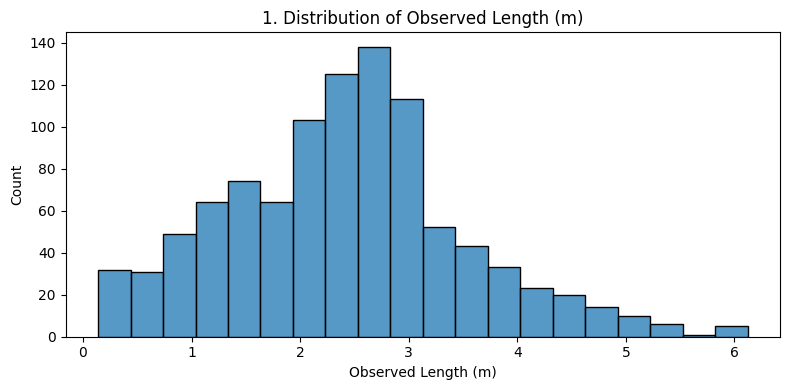

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(df['Observed Length (m)'], bins=20)
plt.title(f"{plot_no}. Distribution of Observed Length (m)")
show_fig()
plot_no += 1

### Histogram: Observed Weight

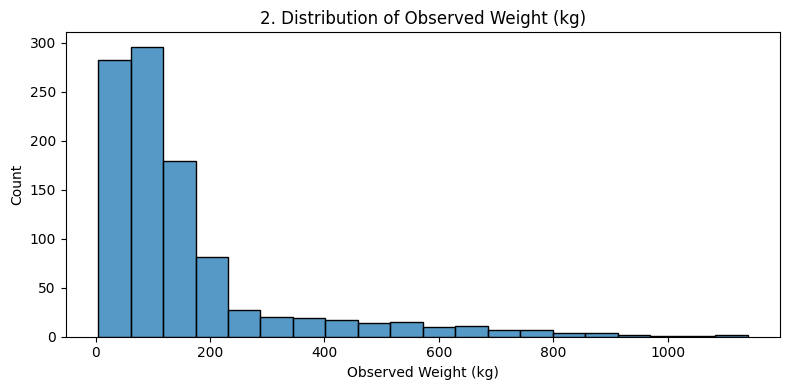

In [23]:
plt.figure(figsize=(8,4))
sns.histplot(df['Observed Weight (kg)'].dropna(), bins=20)
plt.title(f"{plot_no}. Distribution of Observed Weight (kg)")
show_fig()
plot_no += 1

### Boxplot: Length by Age Class

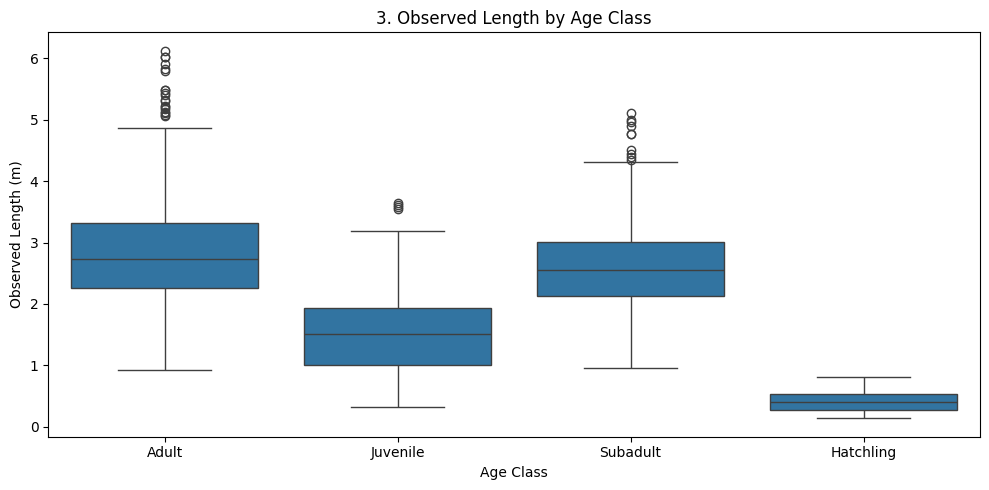

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Age Class', y='Observed Length (m)', data=df)
plt.title(f"{plot_no}. Observed Length by Age Class")
show_fig()
plot_no += 1

### Boxplot: Weight by Sex

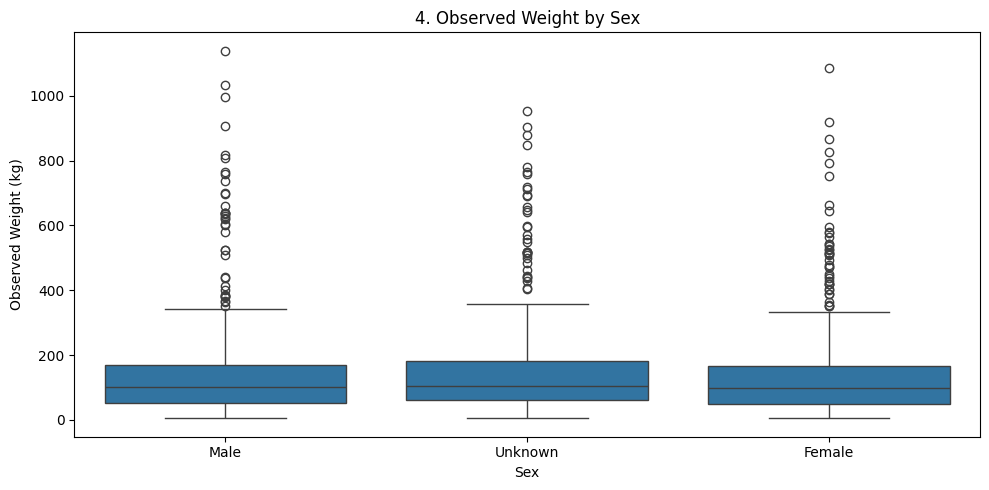

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Sex', y='Observed Weight (kg)', data=df)
plt.title(f"{plot_no}. Observed Weight by Sex")
show_fig()
plot_no += 1